In [1]:
%load_ext autoreload
%autoreload 2

# Introduction

This analysis explores the effect of the COVID-19 lockdown in the air pollution in Barcelona from a _different perspective_: by using open tools for sensing and data analysis. The main motivation for carrying out this effort is not to demonstrate the obvious effect of the decrease in air pollution and noise levels, which is easily percieved by anyone living in Barcelona and has been published in the media in various formats. This analysis, however is motivated by the idea that anyone, with or without sensors, can access this data, dig through it, and extract their own conclusions, not needing the media or others to analyse it for them.

To achieve this, we have used low-cost sensor data from the open source project: [Smart Citizen](http://smartcitizen.me). The sensors are currently deployed around the world by individual users or communities that are willing to know more about their environment, and more in particular, about air pollution. As well, we have included data from open portals, such as the air pollution data and traffic information from the local authorities in Barcelona. The data is currently accesible by anyone through the [Smart Citizen API](https://api.smartcitizen.me/), or the [Open Data Portal API](https://opendata-ajuntament.barcelona.cat/).

Although all this might sound interesting, accessing the data, and analysing it, can be hard to do. For this reason, this whole report makes uses of an open data analysis framework that integrates these, and more data sources, as well as analysis, reporting and modeling tools. This is available for anyone to use or contribute in [this repository](https://github.com/fablabbcn/smartcitizen-data-framework). To summarize, what we see below is all open, integrated and available for anyone to use:

In [7]:
from IPython.display import HTML, display
display(HTML('<img src="../assets/images/Workflow.png">'))

Finally, let's wrap it all up by asking some questions:
- Is the car the main source of pollution at the moment?
- What will be the new normal, once the COVID-19 lockdown is over? Will we have more or less pollution than before? And, will we be able to know?
- Will we use more private transport because people is paranoid of the metro?

## Load Data

In [2]:
from src.data.data import Data
data = Data()

Loading configuration file from: /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/src/config.yaml
Loaded configuration file
Loading blueprints file from: /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/interim/blueprints.yaml
Loaded blueprints file
Merged blueprints
Saved updated sensor names and dumped into /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/interim/sensornames_21.json
Saved updated sensor names and dumped into /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/interim/sensornames_20.json
Updating blueprints file from: /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/interim/blueprints.yaml
Updated blueprints file

### Stations data

This is the data of two Smart Citizen Stations that are currently located at Avda Roma with Compte Urgell.

In [3]:
scs_testname = '2020-04_INT_EVALUATION_CSIC_AVDA_ROMA'

# Set options below or use defaults from config.yaml 
options = {'clean_na': None}
# options = {'clean_na': False, 'clean_na_method': 'drop', 'frequency': '3Min', 'load_cached_API': True, 'store_cached_API': True}

In [4]:
data.load_test(scs_testname, options);

Loading test 2020-04_INT_EVALUATION_CSIC_AVDA_ROMA
Using options: {'cached_data_margin': 1, 'load_cached_API': True, 'store_cached_API': True, 'clean_na': None}
---------------------------
Loading device 10751
Device 10751 has last reading at 2020-04-12T16:29:46Z
Checking if we can load cached data
Removing sensors from device: ['EXT_TEMP']
Device sensors after removal: ['BATT', 'EXT_PM_A_1', 'EXT_PM_A_10', 'EXT_PM_A_25', 'EXT_PM_B_1', 'EXT_PM_B_10', 'EXT_PM_B_25', 'GB_1A', 'GB_1W', 'GB_2A', 'GB_2W', 'GB_3A', 'GB_3W', 'GB_HUM', 'GB_TEMP', 'HUM', 'LIGHT', 'TEMP']
Loaded cached files
Checking if new data is to be loaded
Loading new data from API
First reading requested: 2020-04-12 13:12:00+02:00
Last reading requested: 2020-04-12 16:29:46+00:00
Requesting data from SC API
Device ID: 10751
Using rollup: 1m
Device 10751 is located at 41.3853819853179, 2.15413570404053
Device 10751 timezone is Europe/Madrid
Device 10751 has last reading at 2020-04-12T16:29:46Z
Device 10751 was added at 2020

### SCKs data

Get all the SCKs that are currently online in Barcelona and were posting before the lockdown

In [5]:
from src.data.api import ScApiDevice

outdoor_kits = ScApiDevice.get_world_map(min_date='2020-03-15', max_date='2020-04-01', city='Barcelona', tags = ['outdoor'], tag_method = 'all')
print ('Outdoor Kits')
print (outdoor_kits)

indoor_kits = ScApiDevice.get_world_map(min_date='2020-03-15', max_date='2020-04-01', city='Barcelona', tags = ['indoor', 'online'], tag_method = 'all')
print ('Indoor Kits')
print (indoor_kits)

Outdoor Kits
[10015, 10751, 9657, 9781, 10869, 5353, 10752, 9693, 10664, 10640, 9955, 11025, 9791, 10504]
Indoor Kits
[4640, 4498, 5531, 10016, 10916, 10728, 10650, 10911, 11041, 10731, 10919, 10729, 10732, 10699, 10921, 10917, 10905, 9953, 11040, 10647, 10648, 10903, 10909, 10709, 10730, 11039]


In [ ]:
blueprint = 'sck_21'
_sck_testname_indoor = 'COVID_SCK_BARCELONA_INDOOR'

# Here we specify the different options for data load
options = {'frequency': '5Min',
            'min_date': '2020-01-01',
            'max_date': None,
            'clean_na': None
            }

# Add devices to list
from src.data.device import Device

tdevices = list()
for device in indoor_kits:
    tdevices.append(Device(blueprint = blueprint, descriptor = {'id': str(device), 
                                                                'source': 'api'
                                                                }))
# We load the data based on the input above
sck_testname_indoor = data.load_devices(_sck_testname_indoor, tdevices, options = options)

In [21]:
blueprint = 'sck_21'
_sck_testname_outdoor = 'COVID_SCK_BARCELONA_OUTDOOR'

# Here we specify the different options for data load
options = {'frequency': '5Min',
            'min_date': '2020-01-01',
            'max_date': None,
            'clean_na': None
            }

# Add devices to list
from src.data.device import Device

tdevices = list()
for device in outdoor_kits:
    tdevices.append(Device(blueprint = blueprint, descriptor = {'id': str(device), 
                                                                'source': 'api'
                                                                }))
# We load the data based on the input above
sck_testname_outdoor = data.load_devices(_sck_testname_outdoor, tdevices, options = options)

Add device 10015 OK
Add device 10751 OK
Add device 9657 OK
Add device 9781 OK
Add device 10869 OK
Add device 5353 OK
Add device 10752 OK
Add device 9693 OK
Add device 10664 OK
Add device 10640 OK
Add device 9955 OK
Add device 11025 OK
Add device 9791 OK
Add device 10504 OK
Creating new test
Test update Finished
Processing files
Test 2020-04_INT_COVID_SCK_BARCELONA_OUTDOOR path: /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/processed/2020/04/2020-04_INT_COVID_SCK_BARCELONA_OUTDOOR
Test creation finished
Loading test 2020-04_INT_COVID_SCK_BARCELONA_OUTDOOR
Using options: {'cached_data_margin': 1, 'load_cached_API': True, 'store_cached_API': True, 'clean_na': None, 'min_date': '2020-01-01', 'max_date': None, 'frequency': '5Min'}
---------------------------
Loading device 10015
Device 10015 is located at 41.4338543, 2.19194549999997
Device 10015 timezone is Europe/Madrid
Device 10015 has last reading at 2020-04-12

### Agencia salut publica

In [7]:
from src.data.api import DadesObertesApiDevice

do_stations = DadesObertesApiDevice.get_world_map(city='Barcelona')
print ('Agencia Salut Publica Stations')
print (do_stations)

Agencia Salut Publica Stations
[8019042, 8019043, 8019044, 8019050, 8019004]


In [8]:
blueprint = 'csic_station'
_do_testname = 'COVID_ASP_BARCELONA'

# Here we specify the different options for data load
options = {'frequency': '1H',
            'min_date': '2020-01-01',
            'max_date': None,
            'clean_na': None
            }

# Add devices to list
from src.data.device import Device

tdevices = list()
for device in do_stations:
    tdevices.append(Device(blueprint = blueprint, descriptor = {'id': str(device), 
                                                                'source': 'api'
                                                                }))
# We load the data based on the input above
do_testname = data.load_devices(_do_testname, tdevices, options = options)

Add device 8019042 OK
Add device 8019043 OK
Add device 8019044 OK
Add device 8019050 OK
Add device 8019004 OK
Creating new test
Test update Finished
Processing files
Test 2020-04_INT_COVID_ASP_BARCELONA path: /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/processed/2020/04/2020-04_INT_COVID_ASP_BARCELONA
Test creation finished
Loading test 2020-04_INT_COVID_ASP_BARCELONA
Using options: {'cached_data_margin': 1, 'load_cached_API': True, 'store_cached_API': True, 'clean_na': None, 'min_date': '2020-01-01', 'max_date': None, 'frequency': '1H'}
---------------------------
Loading device 8019042
Device 8019042 is located at 41.37878, 2.133099
Device 8019042 timezone is Europe/Madrid
Cannot load cached data with an API that does not allow checking when was the last reading available
Requesting data from Dades Obertes API
Device ID: 8019042
Device 8019042 timezone is Europe/Madrid
Successful filtering
Successful pivot

True

### Traffic data API

Check traffic data from here: https://opendata-ajuntament.barcelona.cat/data/en/dataset/trams

NB: Find the tram ids: https://opendata-ajuntament.barcelona.cat/data/ca/dataset/transit-relacio-trams

## Process data

### Add extra metrics

We will add extra metrics for the different devices in our tests.
First the stations:

In [9]:
for metric in ['CO', 'EXT_PM_1_CLEAN', 'NOISE_A', 'HUM']:
    for device in ['10751', '10752']:    
        data.tests[scs_testname].devices[device].add_metric({f'{metric}_AVG_1D': {'process': 'rolling_avg',
                                                                'kwargs': {'name': metric,
                                                                           'window_size': '1D'}
                                                               }
                                                     })

Metric {'CO_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'CO', 'window_size': '1D'}}} added to metrics
Metric {'CO_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'CO', 'window_size': '1D'}}} added to metrics
Metric {'EXT_PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'EXT_PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
Metric {'EXT_PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'EXT_PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
Metric {'NOISE_A_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'NOISE_A', 'window_size': '1D'}}} added to metrics
Metric {'NOISE_A_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'NOISE_A', 'window_size': '1D'}}} added to metrics
Metric {'HUM_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'HUM', 'window_size': '1D'}}} added to metrics
Metric {'HUM_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'HUM', 'window_size': '1D'}}} added to metrics


In [31]:
for metric in ['PM_1_CLEAN', 'NOISE_A', 'CCS811_VOCS']:
    for device in outdoor_kits:
        data.tests[sck_testname_outdoor].devices[device].add_metric({f'{metric}_AVG_1D': {'process': 'rolling_avg',
                                                                'kwargs': {'name': metric,
                                                                           'window_size': '1D'}
                                                               }
                                                     })

Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_

In [33]:
data.process_test(scs_testname)
data.process_test(sck_testname_outdoor)

[autoreload of src.data.device failed: Traceback (most recent call last):
  File "/Users/macoscar/opt/miniconda3/envs/smartcitizen-data/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/macoscar/opt/miniconda3/envs/smartcitizen-data/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/macoscar/opt/miniconda3/envs/smartcitizen-data/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/Users/macoscar/opt/miniconda3/envs/smartcitizen-data/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/Users/macoscar/opt/miniconda3/envs/smartcitizen-data/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__

---------------------------
Processing device 10751
Processing CO
Loading basic_4electrode_alg from src.models.process
No units conversion needed for CO
Processing EXT_PM_10_CLEAN
Loading merge_ts from src.models.process
Processing EXT_PM_1_CLEAN
Loading merge_ts from src.models.process
Processing EXT_PM_25_CLEAN
Loading merge_ts from src.models.process
Processing NO2
Loading baseline_dcalc from src.models.process
Processing O3
Loading baseline_dcalc from src.models.process
Processing CO_AVG_1D
Loading rolling_avg from src.models.process
Processing EXT_PM_1_CLEAN_AVG_1D
Loading rolling_avg from src.models.process
Processing NOISE_A_AVG_1D
Loading rolling_avg from src.models.process
Processing HUM_AVG_1D
Loading rolling_avg from src.models.process
---------------------------
Processing device 10752
Processing CO
Loading basic_4electrode_alg from src.models.process
No units conversion needed for CO
Processing EXT_PM_10_CLEAN
Loading merge_ts from src.models.process
Processing EXT_PM_1_CL

True

## Explore Data

In [12]:
from src.visualization.visualization import Plot

### PM1


#### Avinguda Roma
The data from the stations in Avinguda Roma is too volatile for PM due to the storms and different climate conditions

Preparing data for plot
Making 3 subplots
Plotting


<Figure size 432x288 with 0 Axes>

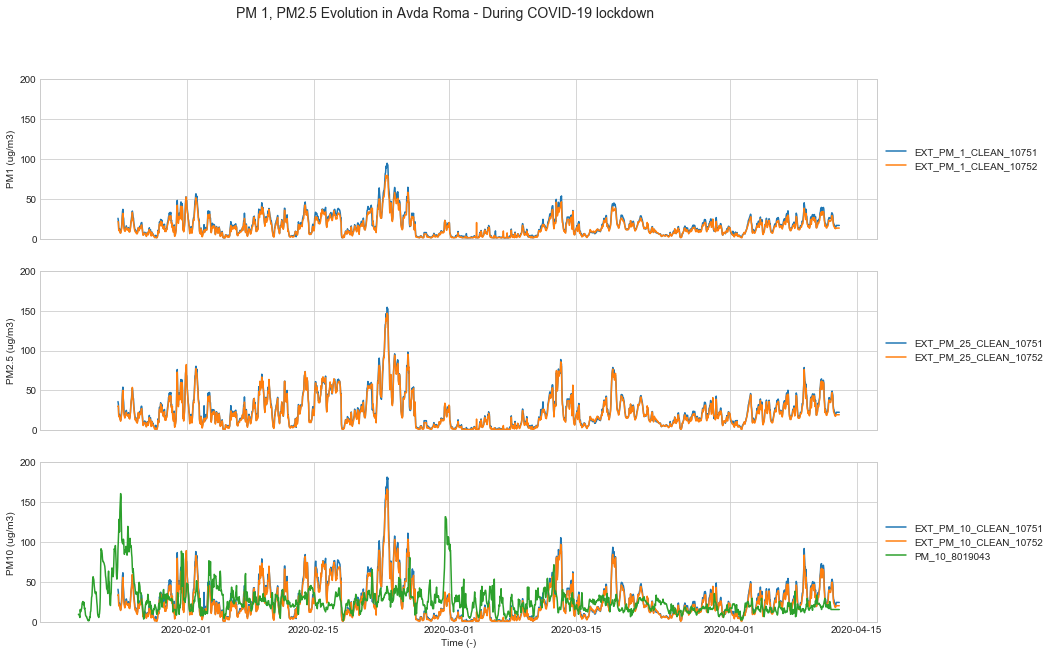

In [13]:
plot_description = {"plot_type": "timeseries",
                    "plotting_library": "matplotlib",
                    "data": {"test": scs_testname,
                                    "traces": {"1": {"device": 'all',
                                                    "channel" : "EXT_PM_1_CLEAN",
                                                    "subplot": 1},
                                              "2": {"device": 'all',
                                                    "channel" : "EXT_PM_25_CLEAN",
                                                    "subplot": 2},
                                              "3": {"device": 'all',
                                                    "channel" : "EXT_PM_10_CLEAN",
                                                    "subplot": 3},
                                              "4": {"device": '8019043',
                                                    "channel" : "PM_10",
                                                    "subplot": 3}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '60Min',
                                "clean_na": 'fill',
                                "max_date": None,
                                "min_date": '2020-01-20'},
                    "formatting": {"xlabel": "Time (-)",
                                   "ylabel": {1: "PM1 (ug/m3)", 2: "PM2.5 (ug/m3)", 3: "PM10 (ug/m3)"},
                                   "yrange": {1: [0, 200], 2: [0, 200], 3: [0, 200]},
                                   "title": "PM 1, PM2.5 Evolution in Avda Roma - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "height": 10,
                                   "width": 15,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description, verbose = False)
plot.plot(data)

This graph shows the evolution of PM during the lockdown. During some days before the lockdown and after it, there is a big effect on the pollution due to the climate conditions

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

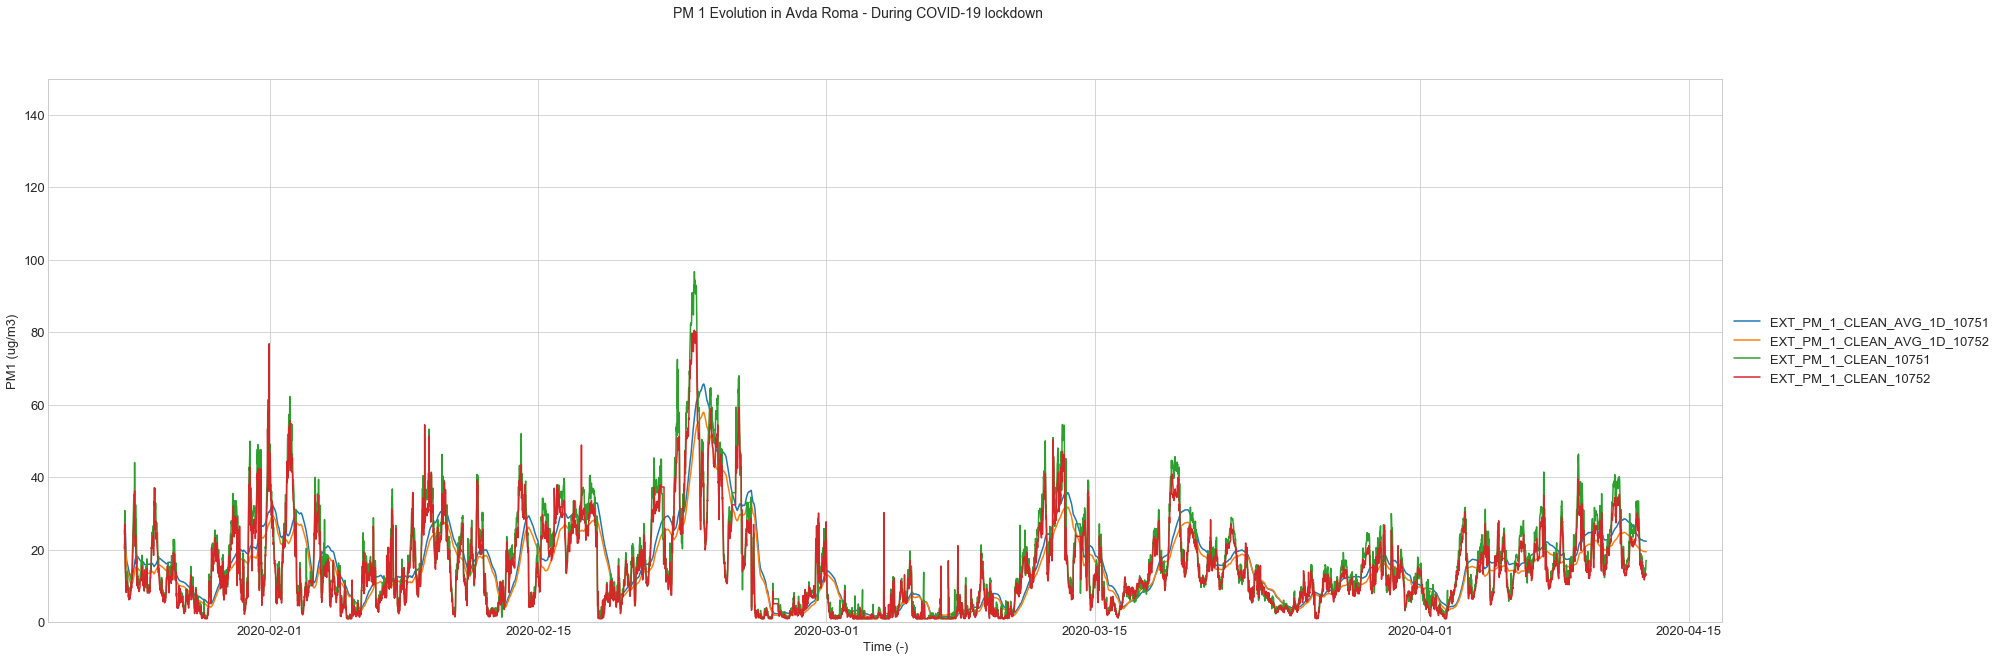

In [273]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                                    "traces": {"1": {"device": 'all',
                                                    "channel" : "EXT_PM_1_CLEAN_AVG_1D",
                                                    "subplot": 1},
                                                "2": {"device": 'all',
                                                    "channel" : "EXT_PM_1_CLEAN",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": 'fill',
                                "max_date": None,
                                "min_date": '2020-01-20'},
                    "formatting": {"xlabel": "Time (-)",
                                   "ylabel": {1: "PM1 (ug/m3)"},
                                   "yrange": {1: [0, 150]},
                                   "title": "PM 1 Evolution in Avda Roma - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 2 subplots
Plotting


<Figure size 432x288 with 0 Axes>

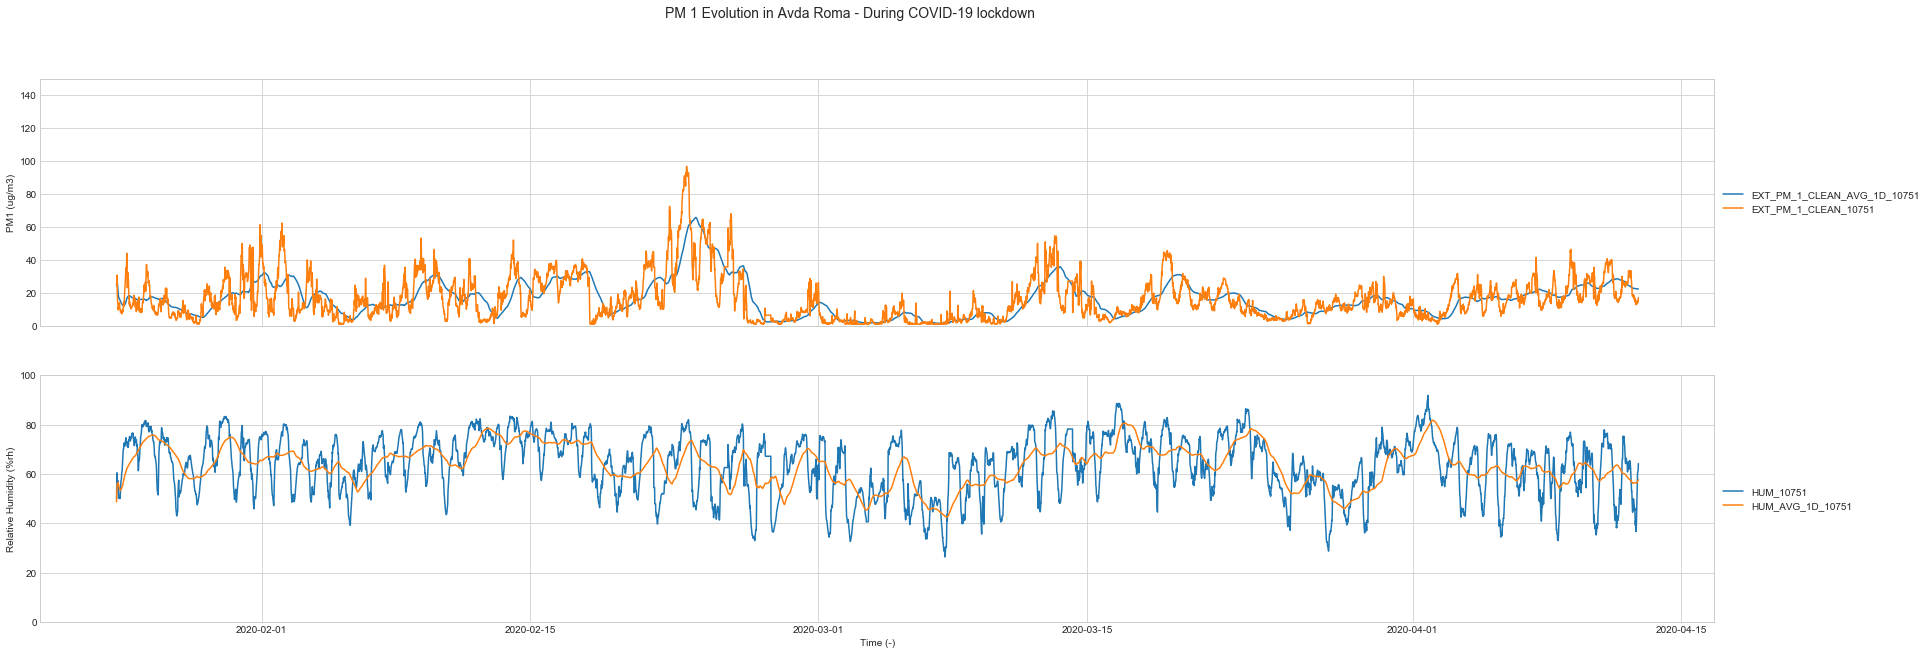

In [135]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                                    "traces": {"1": {"device": '10751',
                                                    "channel" : "EXT_PM_1_CLEAN_AVG_1D",
                                                    "subplot": 1},
                                               "2": {"device": '10751',
                                                    "channel" : "EXT_PM_1_CLEAN",
                                                    "subplot": 1},
                                               "3": {"device": '10751',
                                                    "channel" : "HUM",
                                                    "subplot": 2},
                                                "4": {"device": '10751',
                                                    "channel" : "HUM_AVG_1D",
                                                    "subplot": 2}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": 'fill',
                                "max_date": None,
                                "min_date": '2020-01-20'},
                    "formatting": {"xlabel": "Time (-)",
                                   "ylabel": {1: "PM1 (ug/m3)", 2: "Relative Humidity (%rh)"},
                                   "yrange": {1: [0, 150], 2: [0, 100]},
                                   "title": "PM 1 Evolution in Avda Roma - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "height": 10,
                                   "width": 30,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

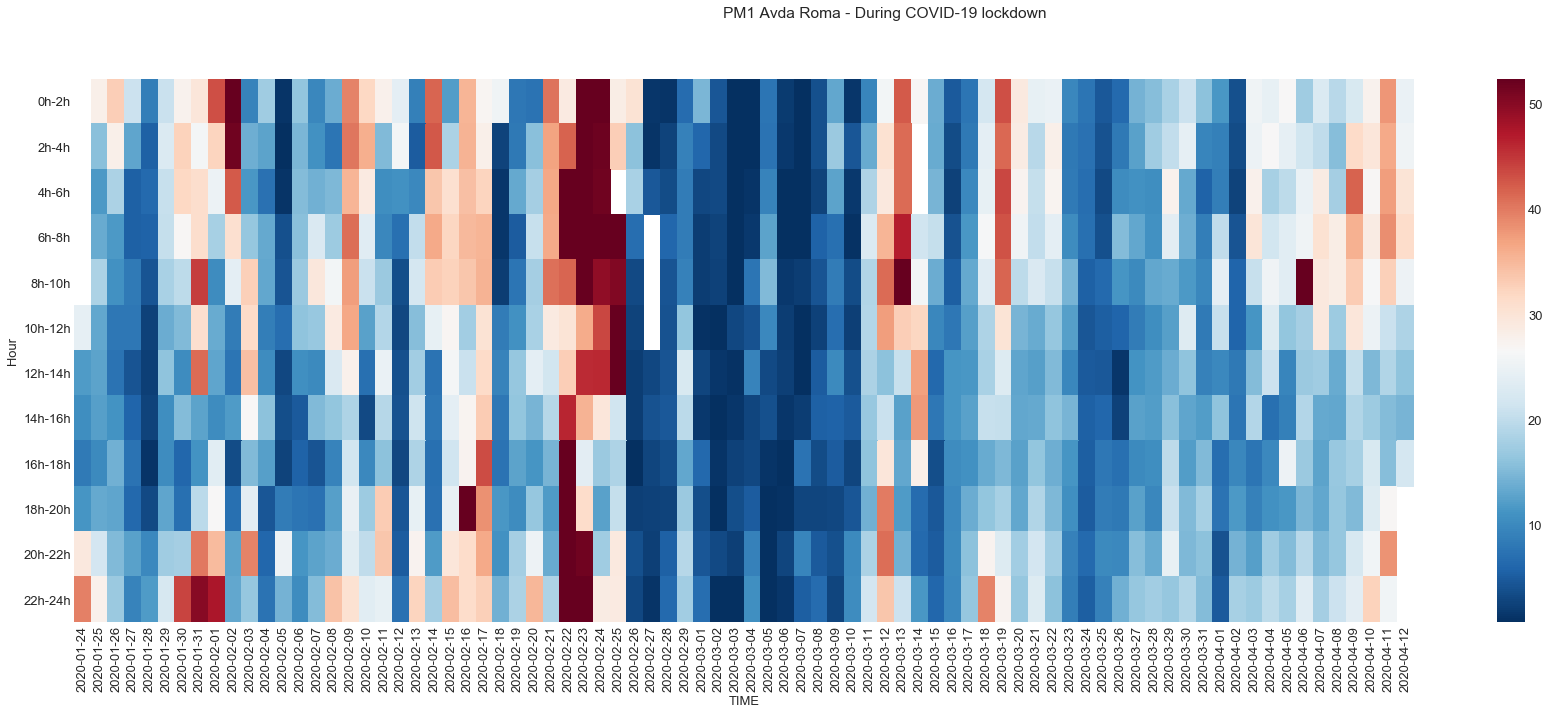

In [272]:
plot_description = {"type": "heatmap",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                    				"traces": {"1": {"device": "10751",
                                        			"channel" : "PM_1",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '2H',
                                "clean_na": None,
                                "min_date": None,
                                "max_date": None,
                                "relative": False},
                    "formatting": {"title": "PM1 Avda Roma - During COVID-19 lockdown",
                                   "cmap": "RdBu_r",
                                   "robust": True,
                                   "vmin": None, 
                                   "vmax": None,                                   
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "frequency_hours": 2}
                    }


plot = Plot(plot_description)
plot.plot(data)

#### SCKs Outdoor

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

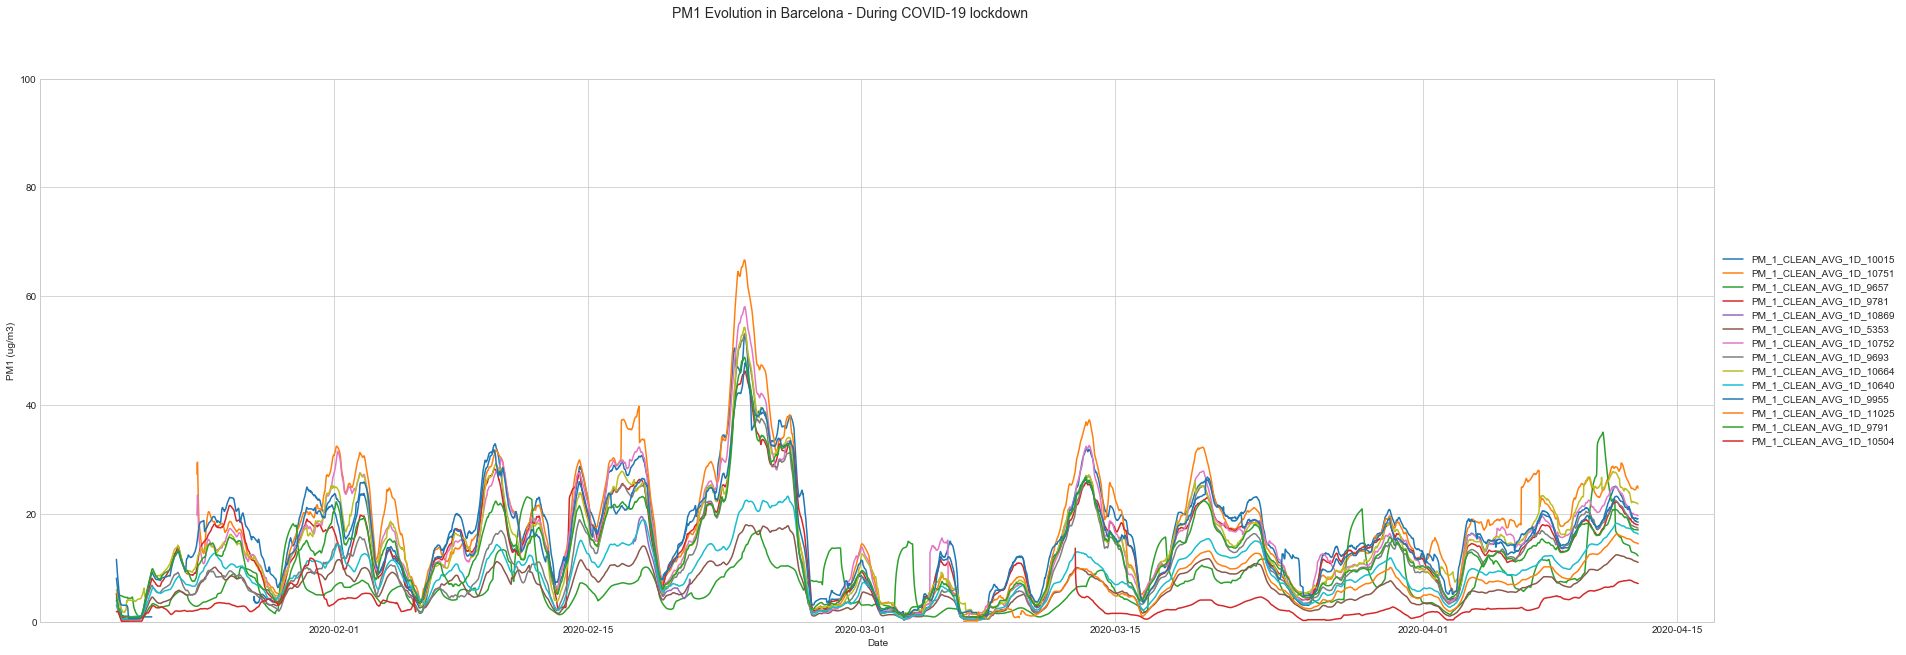

In [138]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                                    "traces": {"1": {"device": outdoor_kits,
                                                    "channel" : "PM_1_CLEAN_AVG_1D",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-01-20'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "PM1 (ug/m3)"},
                                   "yrange": {1: [0, 100]},
                                   "title": "PM1 Evolution in Barcelona - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "height": 10,
                                   "width": 30,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

### TVOC

#### SCKs Outdoor

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

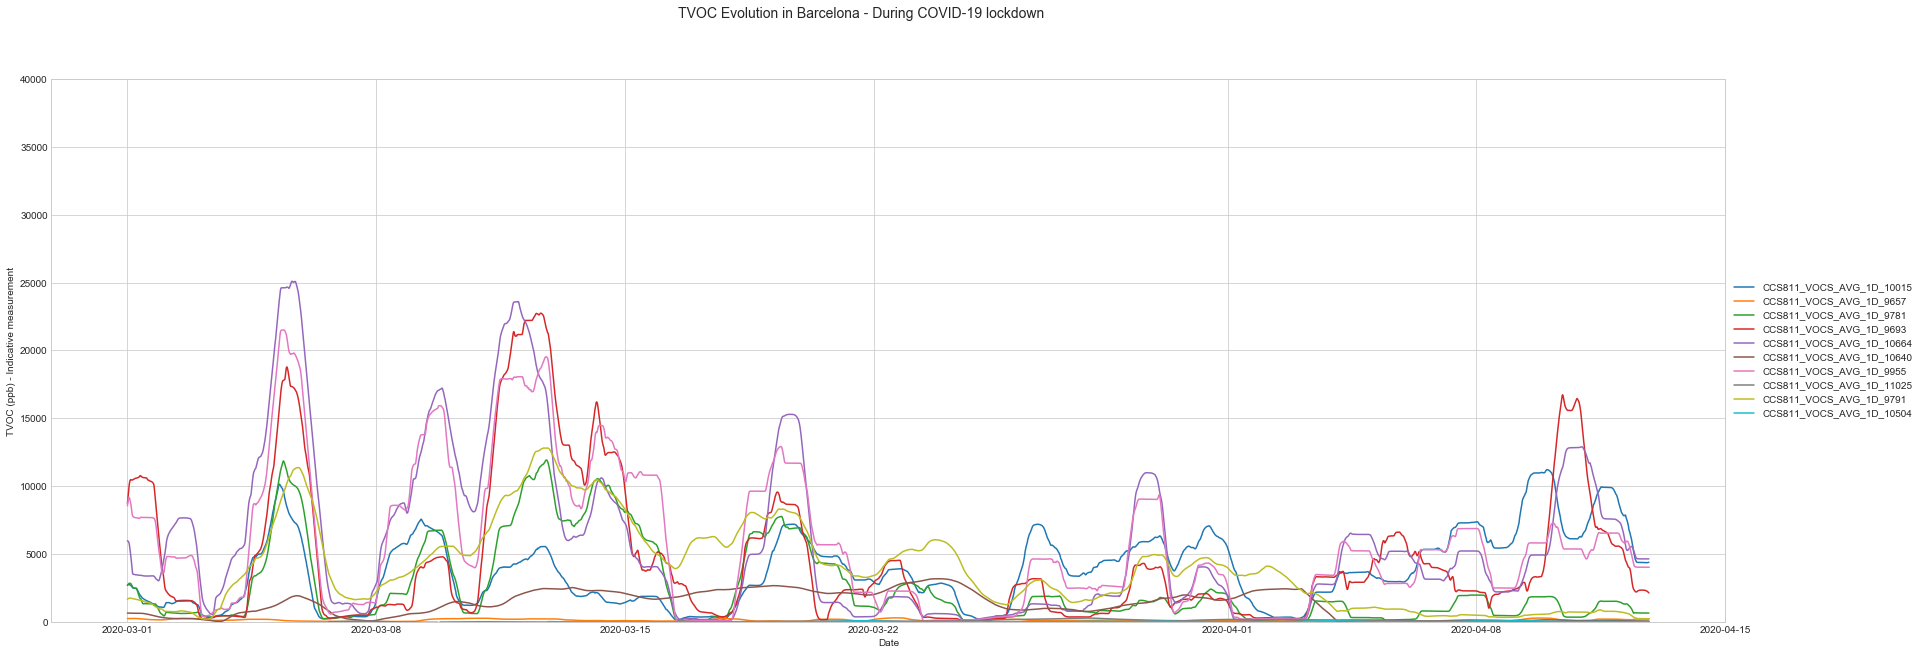

In [139]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                                    "traces": {"1": {"device": outdoor_kits,
                                                    "channel" : "CCS811_VOCS_AVG_1D",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-03-01'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "TVOC (ppb) - Indicative measurement"},
                                   "yrange": {1: [0, 40000]},
                                   "title": "TVOC Evolution in Barcelona - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "height": 10,
                                   "width": 30,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

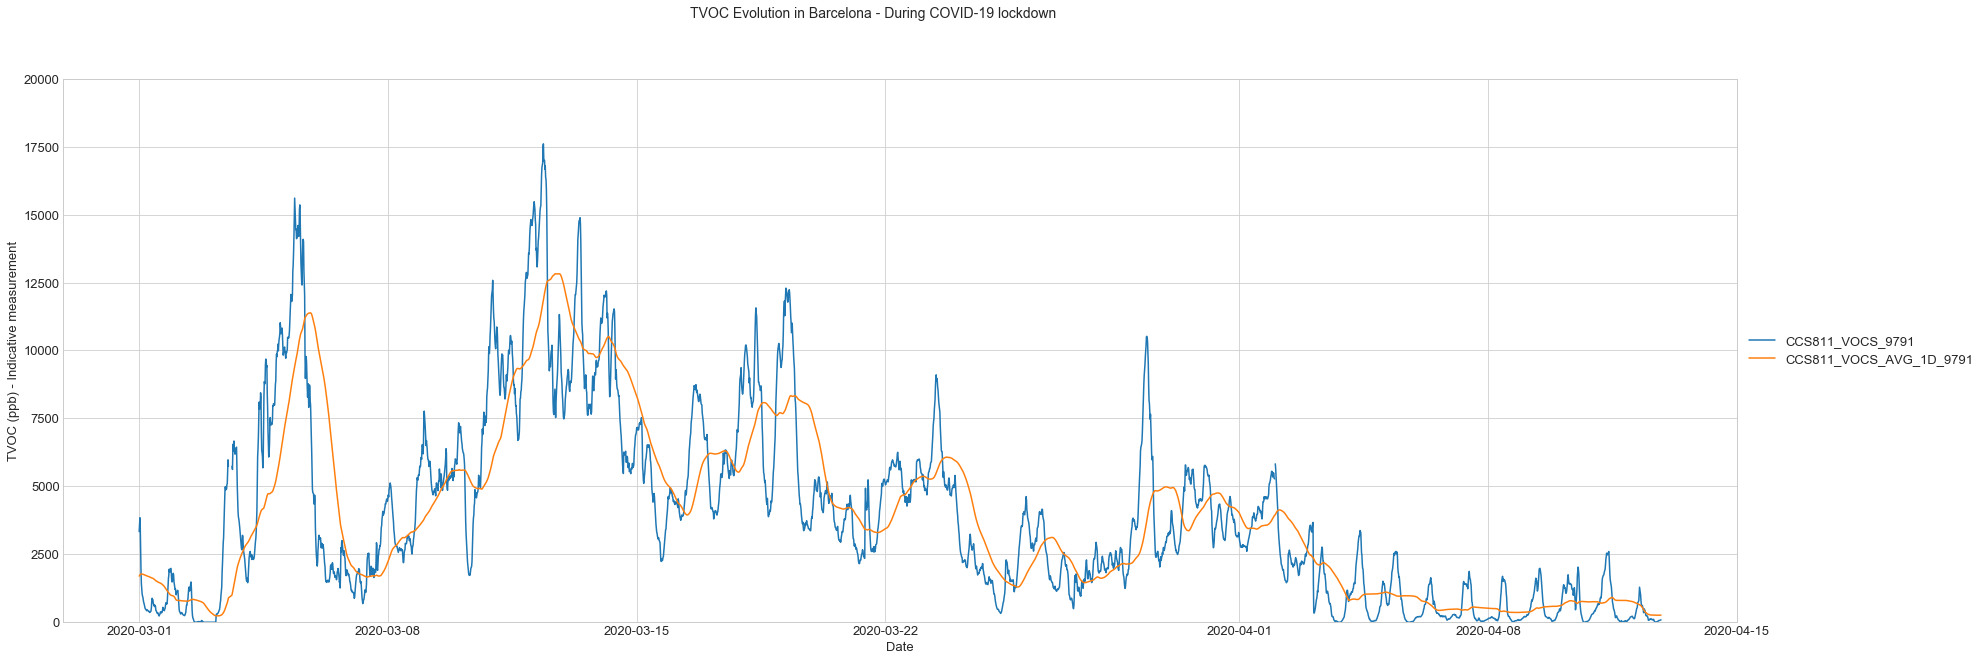

In [271]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                                    "traces": {"1": {"device": 9791,
                                                    "channel" : "CCS811_VOCS",
                                                    "subplot": 1},
                                               "2": {"device": 9791,
                                                    "channel" : "CCS811_VOCS_AVG_1D",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-03-01'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "TVOC (ppb) - Indicative measurement"},
                                   "yrange": {1: [0, 20000]},
                                   "title": "TVOC Evolution in Barcelona - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

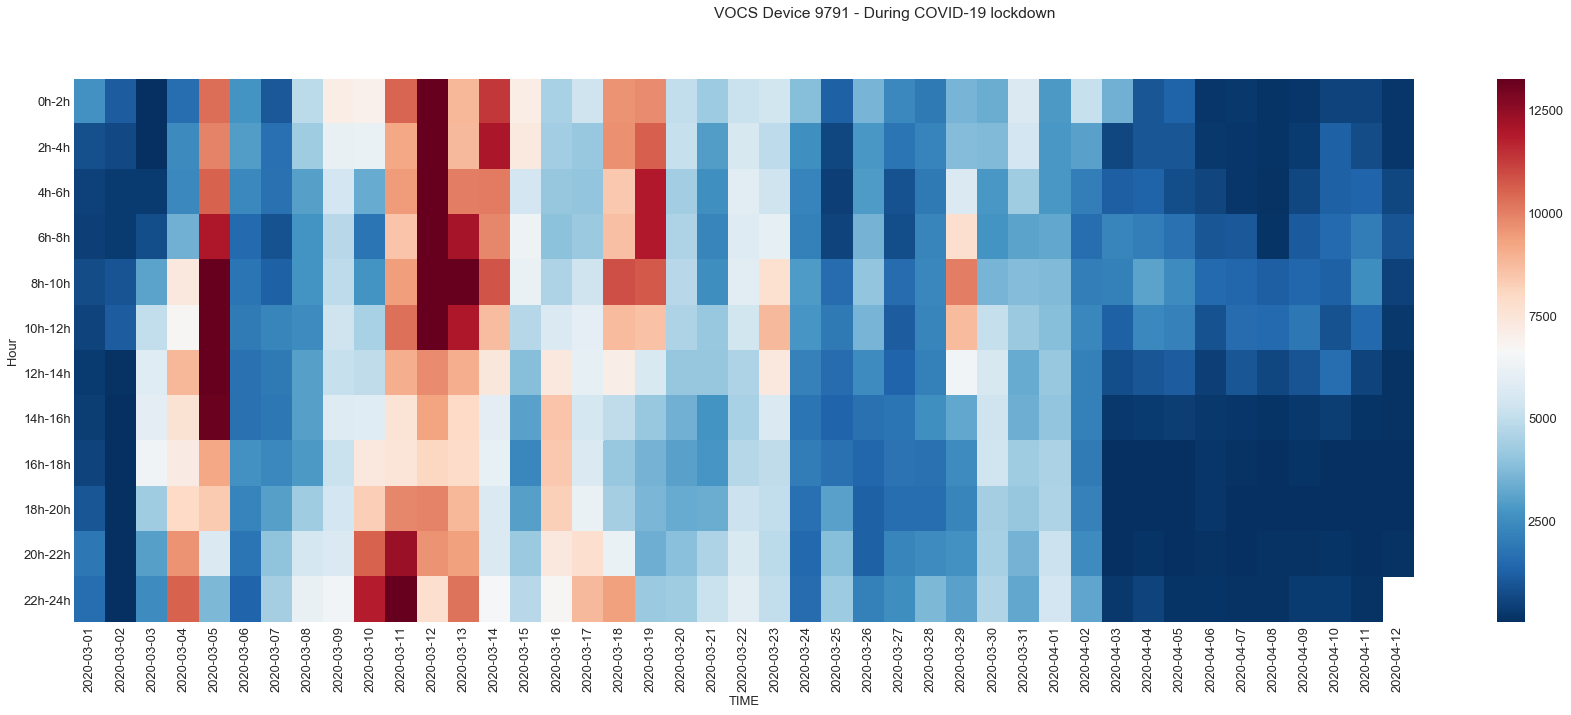

In [269]:
plot_description = {"type": "heatmap",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                                    "traces": {"1": {"device": 9791,
                                                    "channel" : "CCS811_VOCS",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '60Min',
                                "resample": "mean",
                                "clean_na": "fill",
                                "min_date": '2020-03-01',
                                "max_date": None,
                                "relative": False},
                    "formatting": {"title": "VOCS Device 9791 - During COVID-19 lockdown",
                                   "cmap": "RdBu_r",
                                   "robust": True,
                                   "vmin": None, 
                                   "vmax": None,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "frequency_hours": 2}
                    }


plot = Plot(plot_description)
plot.plot(data)

### CO

#### Avinguda Roma
The two stations in Avinguda Roma show a huge decrease in the chemical composition of the area, which is not due to the climate conditions

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

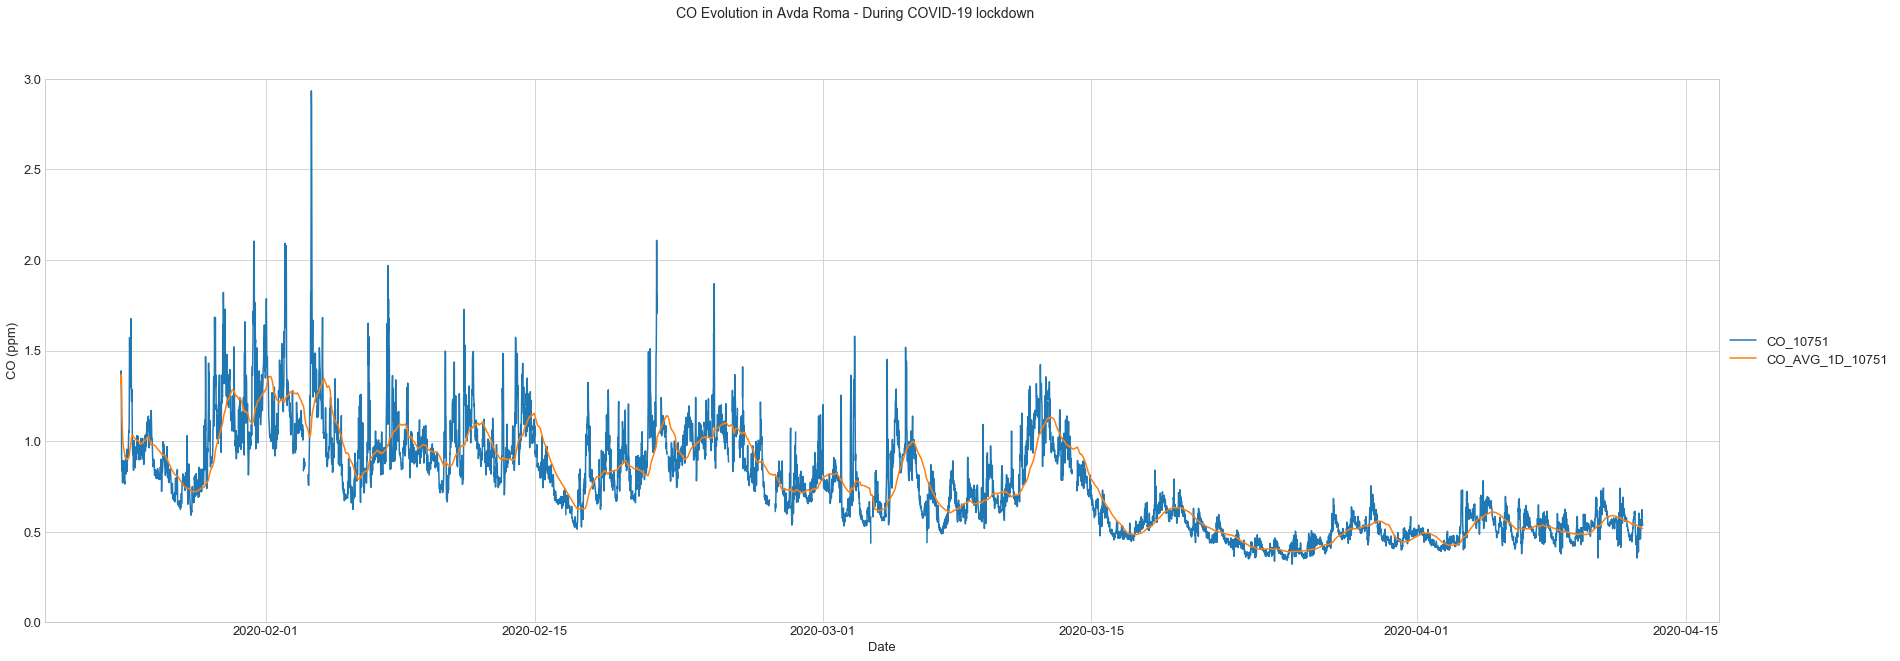

In [268]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                                    "traces": {"1": {"device": '10751',
                                                    "channel" : "CO",
                                                    "subplot": 1},
                                               "2": {"device": '10751',
                                                    "channel" : "CO_AVG_1D",
                                                    "subplot": 1}
                                              }},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-01-20'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "CO (ppm)"},
                                   "yrange": {1: [0, 3]},
                                   "title": "CO Evolution in Avda Roma - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

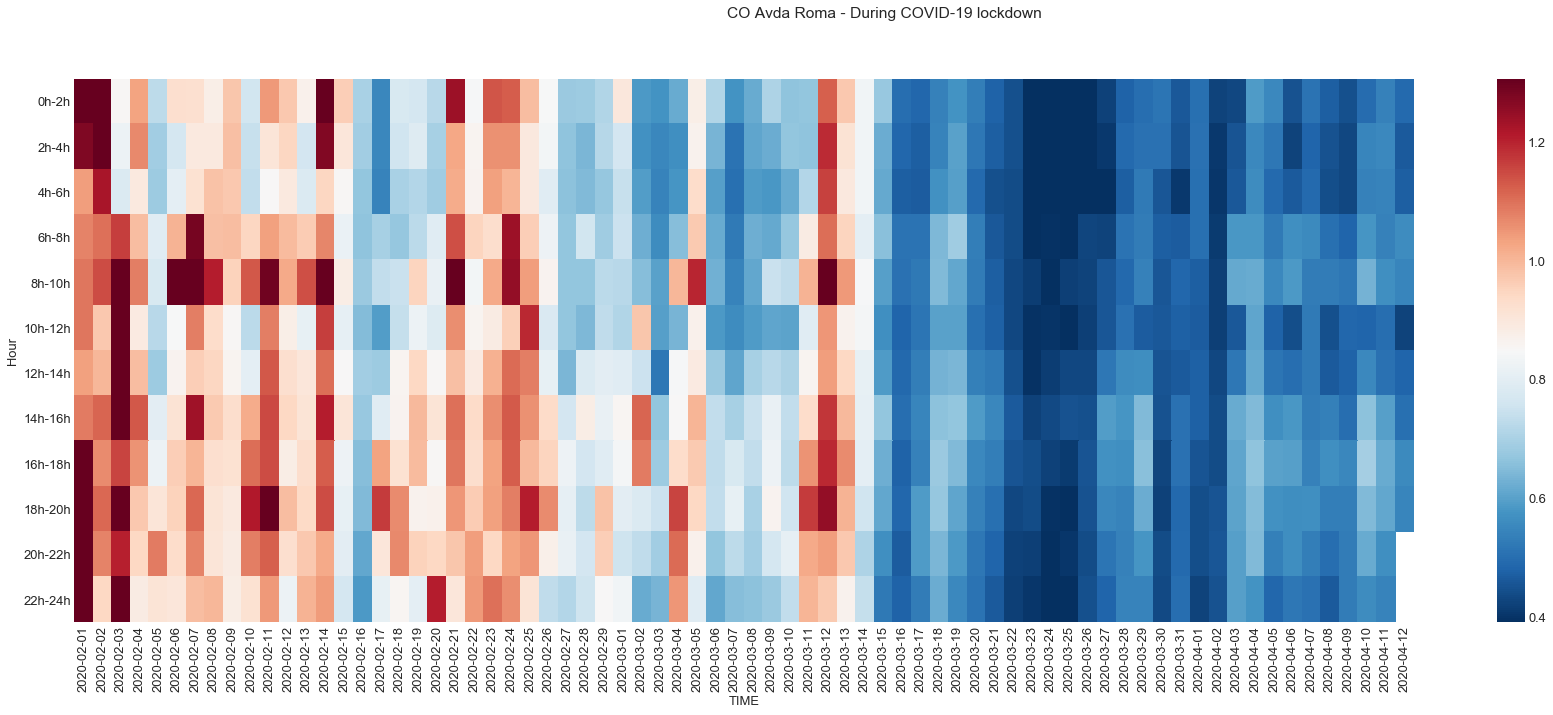

In [267]:
plot_description = {"type": "heatmap",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                    				"traces": {"1": {"device": "10751",
                                        			"channel" : "CO",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '60Min',
                                "resample": "mean",
                                "clean_na": "fill",
                                "min_date": '2020-02-01',
                                "max_date": None,
                                "relative": False},
                    "formatting": {"title": "CO Avda Roma - During COVID-19 lockdown",
                                   "cmap": "RdBu_r",
                                   "robust": True,
                                   "vmin": None, 
                                   "vmax": None,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "frequency_hours": 2}
                    }


plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

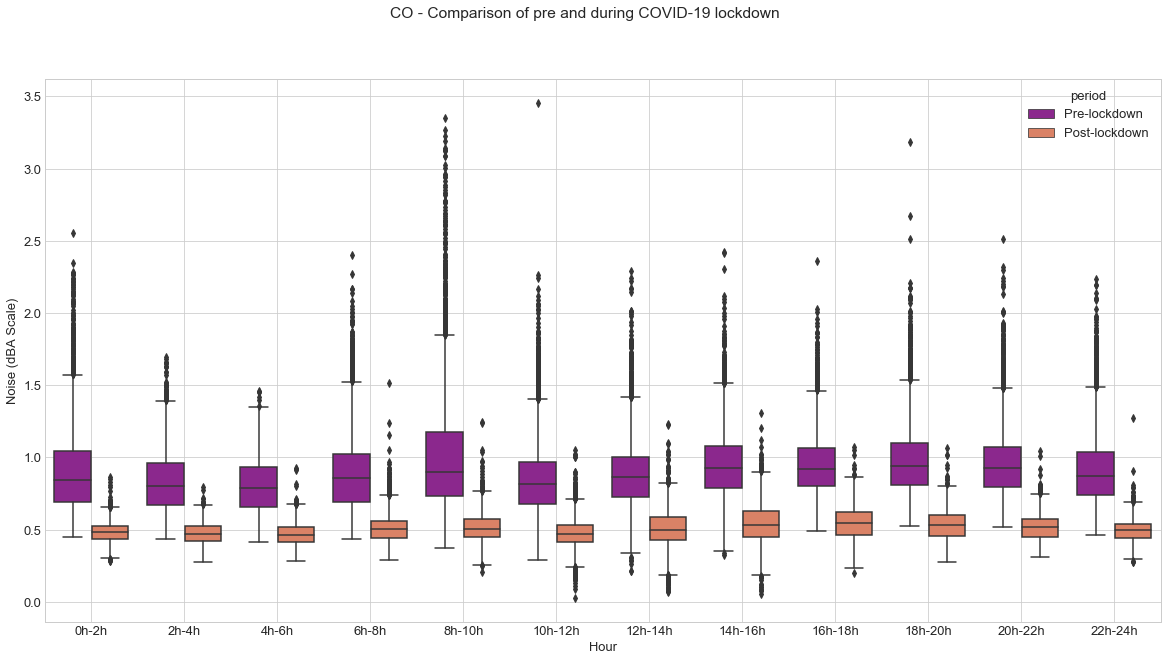

In [266]:
plot_description = {"type": "boxplot",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                    				"traces": {"1": {"device": "10751",
                                        			"channel" : "CO",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '1Min',
                                "clean_na": None,
                                "min_date": None,
                                "max_date": None,
                                "periods": {"dates": ['2020-01-20', '2020-03-15', None],
                                            "labels": ["Pre-lockdown", "Post-lockdown"]
                                           },
                                "relative": False
                                },
                    "formatting": {"title": "CO - Comparison of pre and during COVID-19 lockdown",
                                   "cmap": "plasma",
                                   "ylabel": {1: "Noise (dBA Scale)"},
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 20,
                                   "frequency_hours": 2}
                    }

plot = Plot(plot_description)
plot.plot(data)

### Noise

#### Avda Roma

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

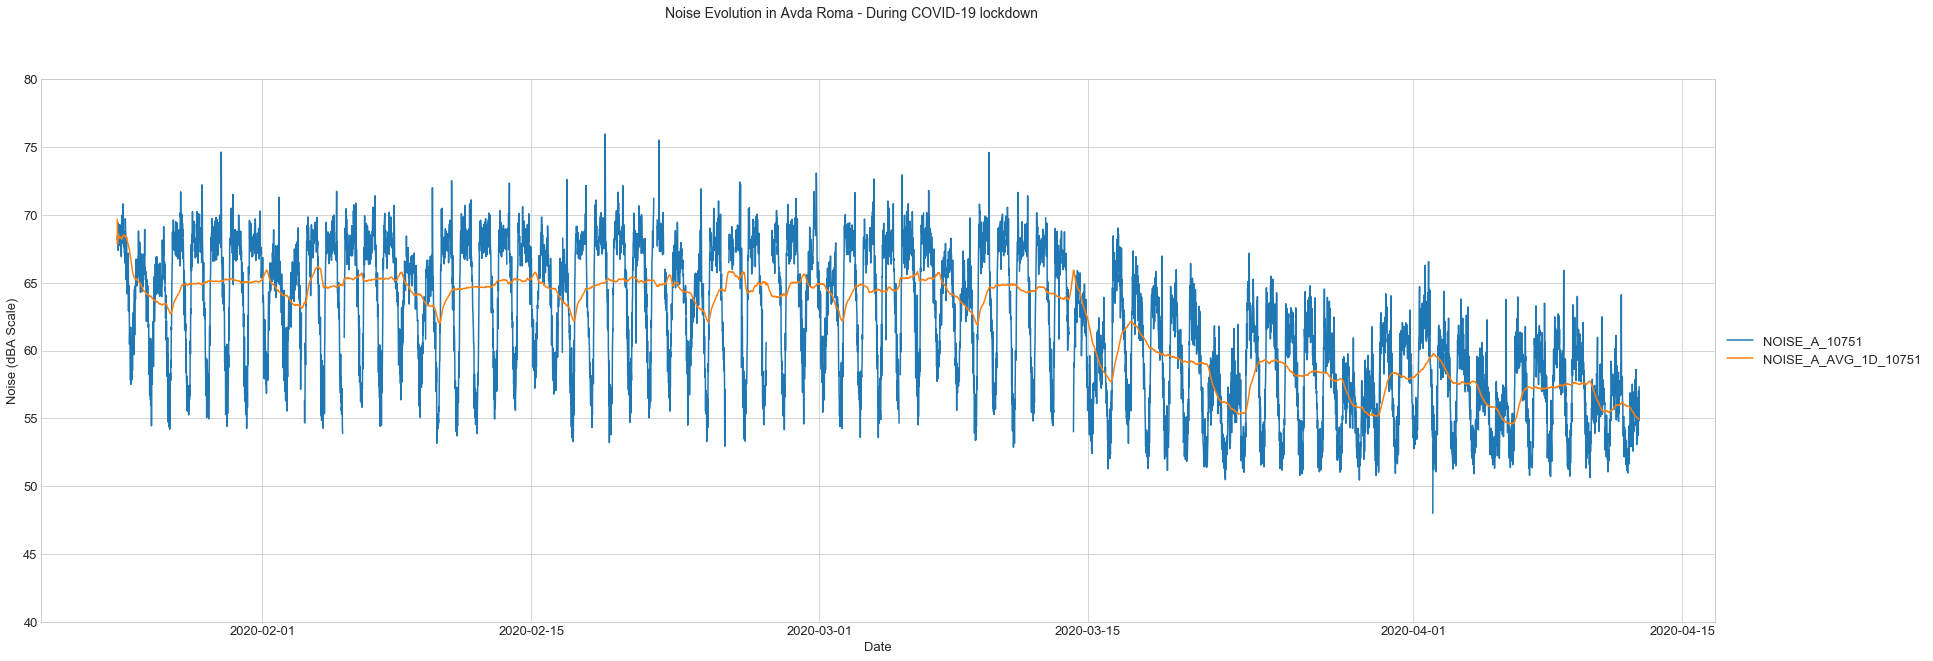

In [265]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                                    "traces": {"1": {"device": '10751',
                                                    "channel" : "NOISE_A",
                                                    "subplot": 1},
                                              "2": {"device": '10751',
                                                    "channel" : "NOISE_A_AVG_1D",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-01-20'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "Noise (dBA Scale)"},
                                   "yrange": {1: [40, 80]},
                                   "title": "Noise Evolution in Avda Roma - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

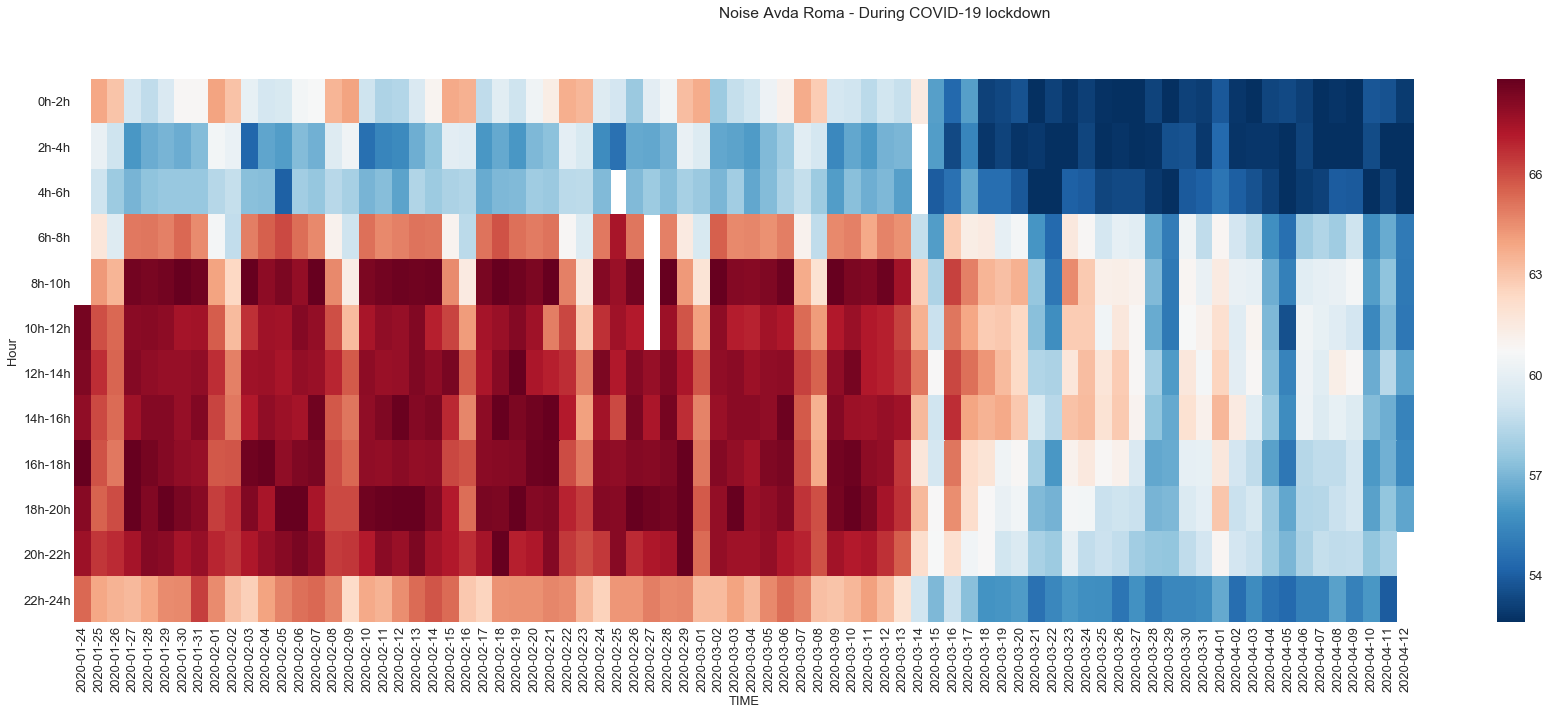

In [264]:
plot_description = {"type": "heatmap",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                    				"traces": {"1": {"device": "10751",
                                        			"channel" : "NOISE_A",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '10Min',
                                "clean_na": None,
                                "min_date": None,
                                "max_date": None,
                                "relative": False},
                    "formatting": {"title": "Noise Avda Roma - During COVID-19 lockdown",
                                   "cmap": "RdBu_r",
                                   "robust": True,
                                   "vmin": None, 
                                   "vmax": None,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "frequency_hours": 2}
                    }


plot = Plot(plot_description)
plot.plot(data)

#### SCKs Outdoor

Plot showing all the kits in Barcelona in outdoor

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

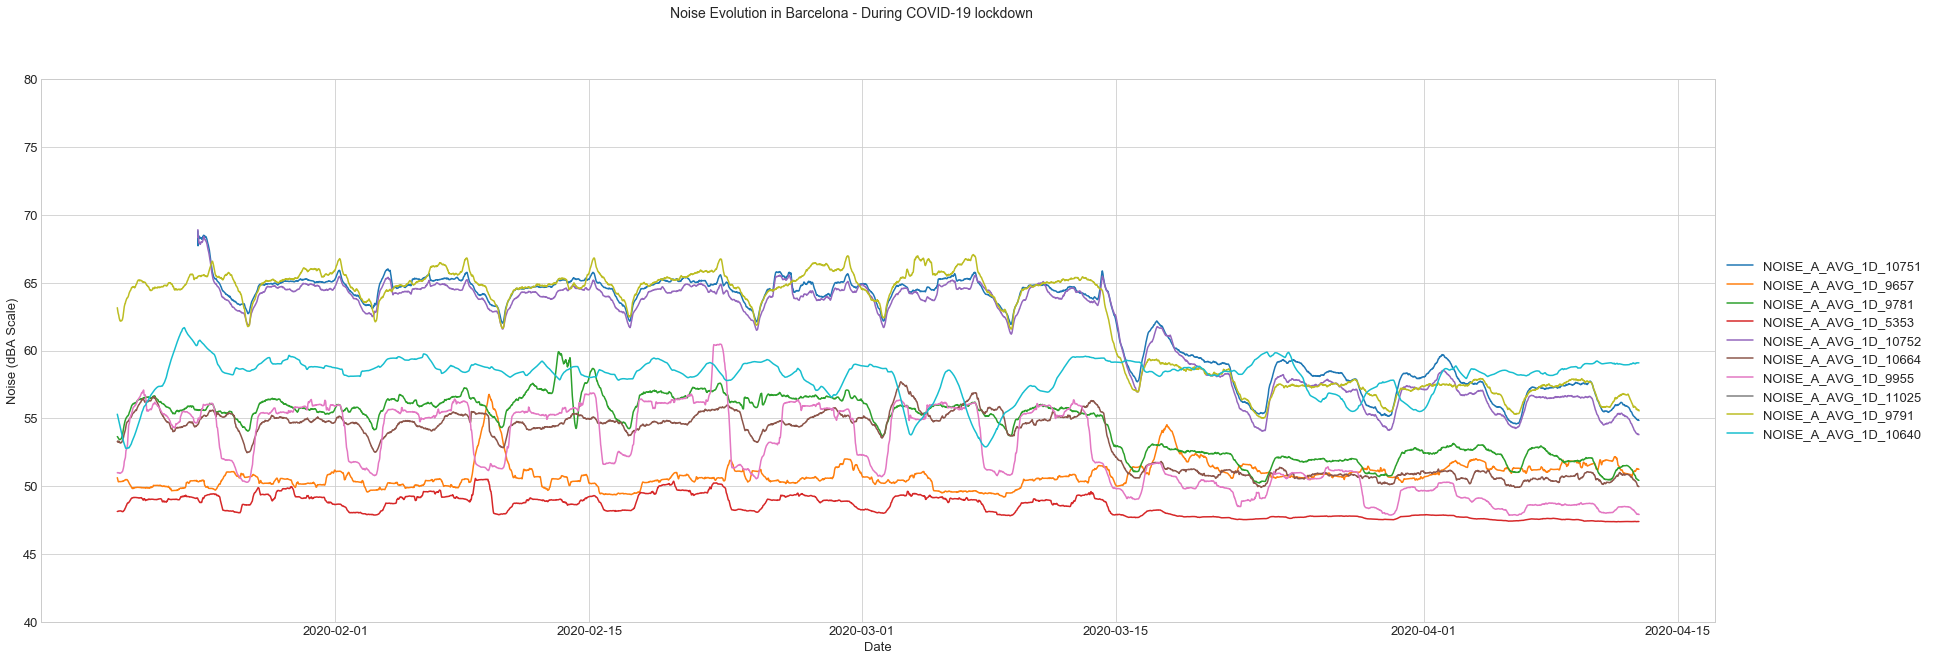

In [263]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                                    "traces": {"1": {"device": [10751, 9657, 9781, 5353, 10752, 10664, 9955, 11025, 9791, 10640],
                                                    "channel" : "NOISE_A_AVG_1D",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-01-20'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "Noise (dBA Scale)"},
                                   "yrange": {1: [40, 80]},
                                   "title": "Noise Evolution in Barcelona - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 2 subplots
Plotting


<Figure size 432x288 with 0 Axes>

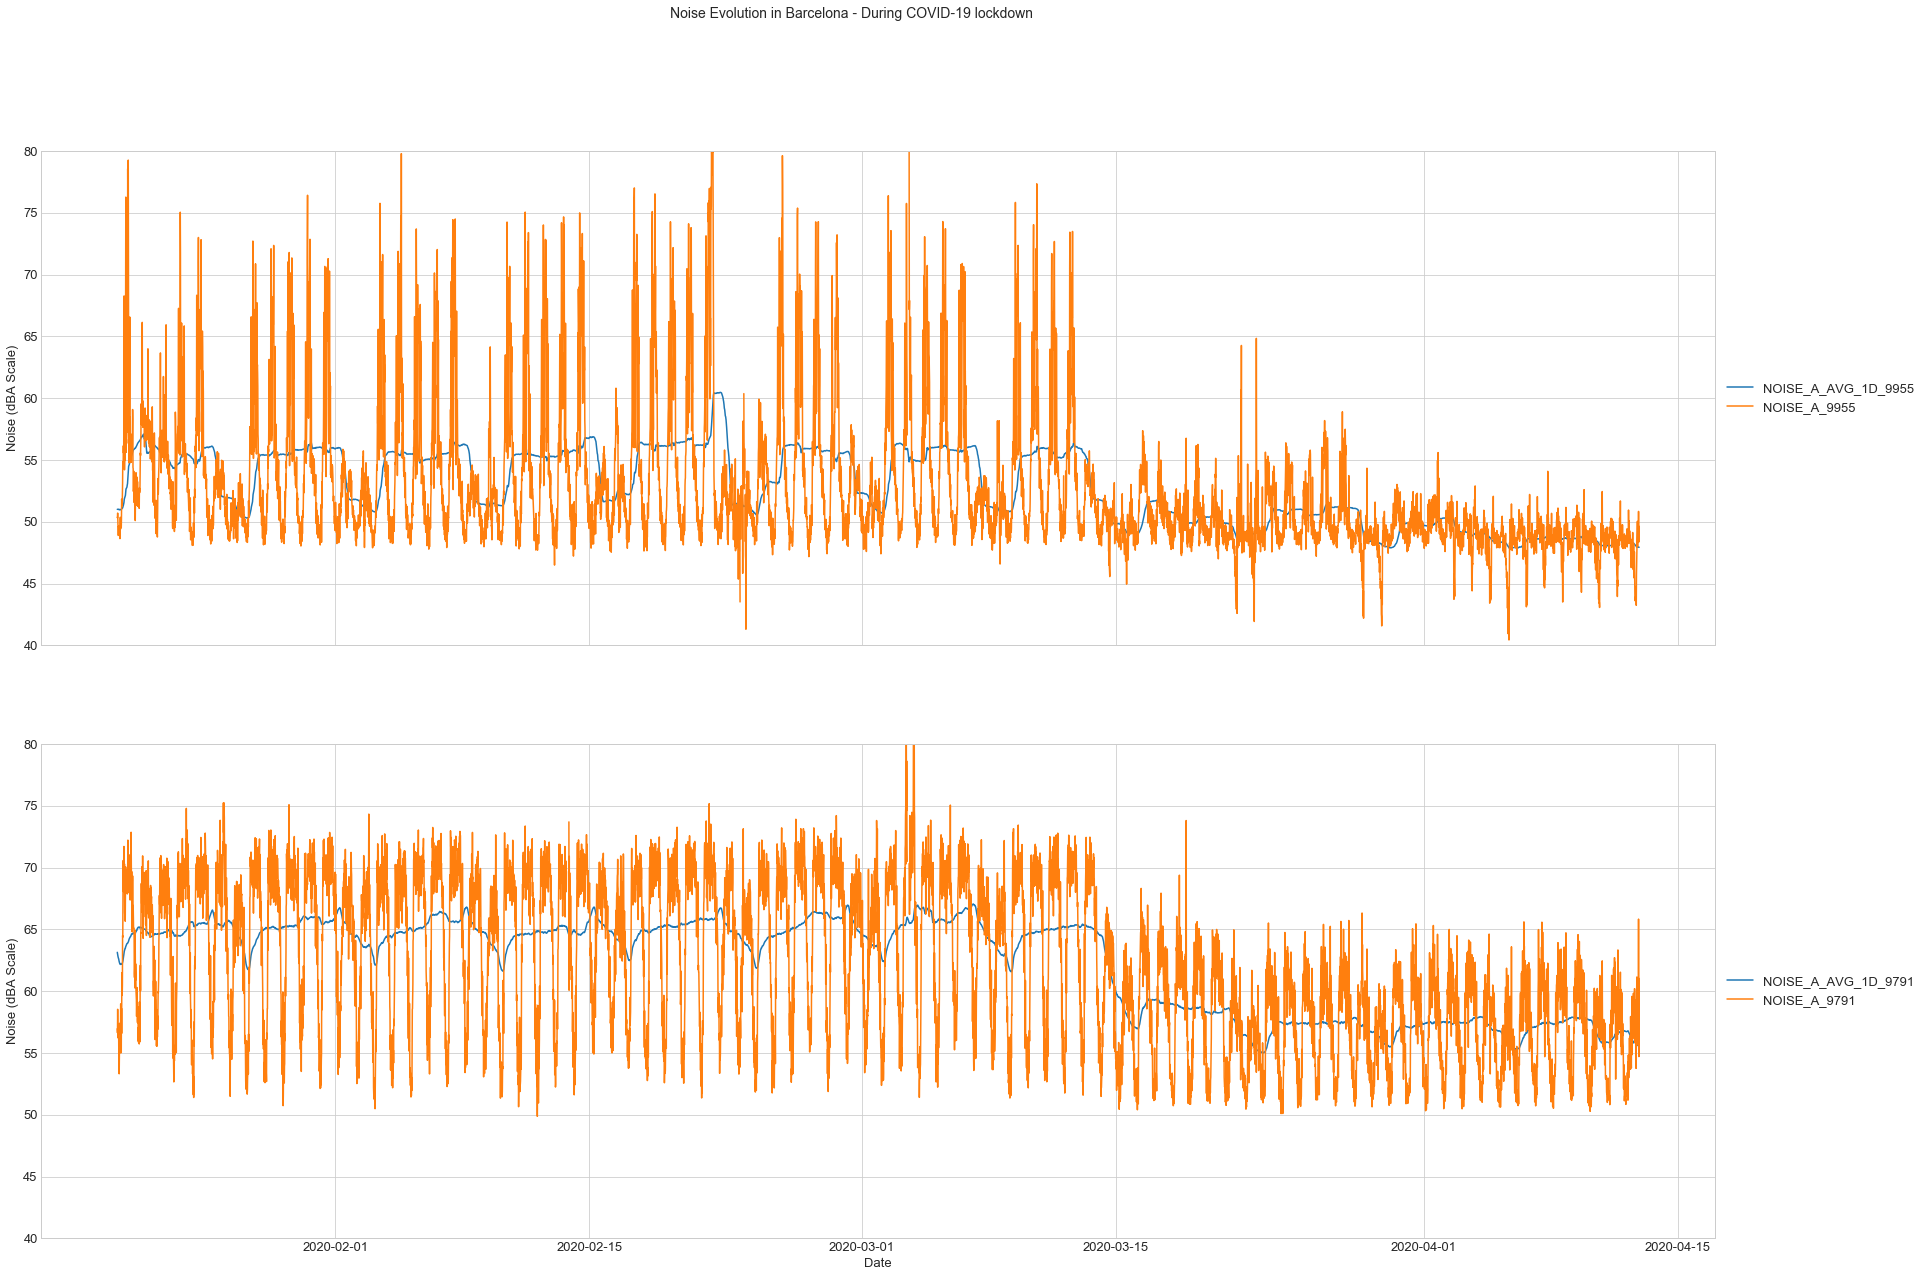

In [262]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                                    "traces": {"1": {"device": [9955],
                                                    "channel" : "NOISE_A_AVG_1D",
                                                    "subplot": 1},
                                               "2": {"device": [9955],
                                                    "channel" : "NOISE_A",
                                                    "subplot": 1},
                                              "3": {"device": [9791],
                                                    "channel" : "NOISE_A_AVG_1D",
                                                    "subplot": 2},
                                               "4": {"device": [9791],
                                                    "channel" : "NOISE_A",
                                                    "subplot": 2}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-01-20'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "Noise (dBA Scale)", 2: "Noise (dBA Scale)"},
                                   "yrange": {1: [40, 80], 2: [40, 80]},
                                   "title": "Noise Evolution in Barcelona - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 20,
                                   "width": 30,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

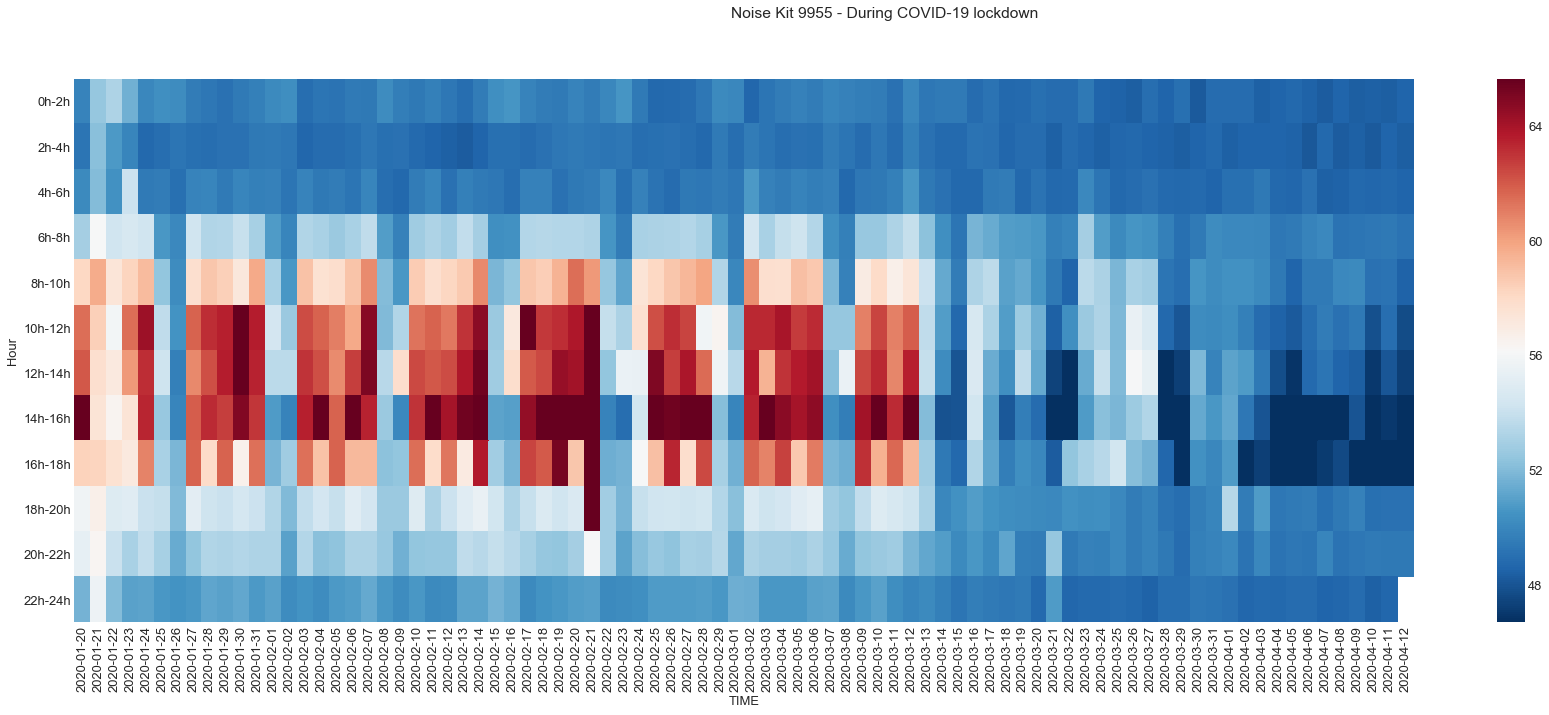

In [261]:
plot_description = {"type": "heatmap",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                    				"traces": {"1": {"device": [9955],
                                        			"channel" : "NOISE_A",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '10Min',
                                "clean_na": None,
                                "min_date": '2020-01-20',
                                "max_date": None,
                                "relative": False
                                },
                    "formatting": {"title": "Noise Kit 9955 - During COVID-19 lockdown",
                                   "cmap": "RdBu_r",
                                   "robust": True,
                                   "vmin": None,
                                   "vmax": None,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "frequency_hours": 2}
                    }


plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

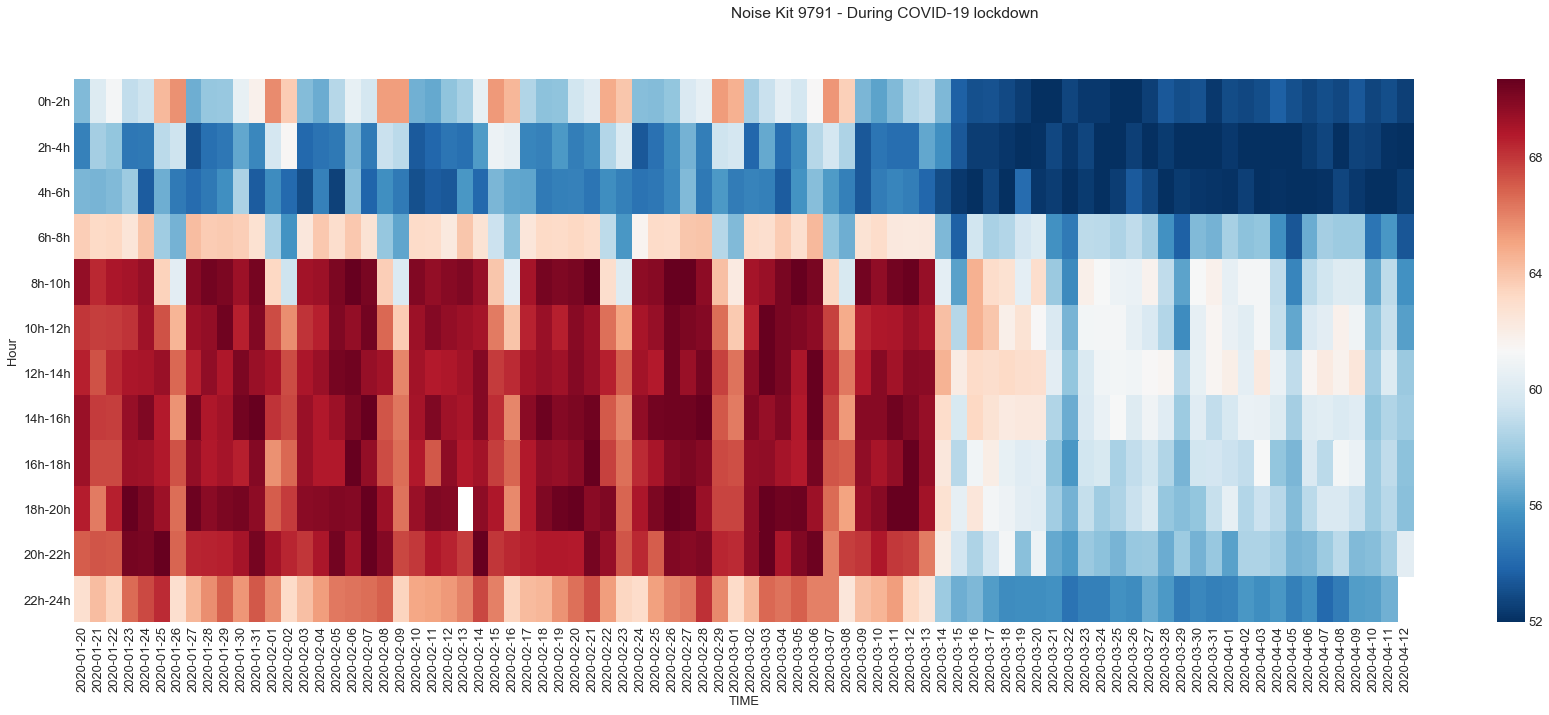

In [258]:
plot_description = {"type": "heatmap",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                    				"traces": {"1": {"device": [9791],
                                        			"channel" : "NOISE_A",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '10Min',
                                "clean_na": None,
                                "min_date": '2020-01-20',
                                "max_date": None,
                                "relative": False
                                },
                    "formatting": {"title": "Noise Kit 9791 - During COVID-19 lockdown",
                                   "cmap": "RdBu_r",
                                   "robust": True,
                                   "vmin": None,
                                   "vmax": None,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "frequency_hours": 2}
                    }

plot = Plot(plot_description)
plot.plot(data)

One of the important factors of noise pollution is not only the intensity but it's variability. This plot shows the comparison between the pre and post lockdown period and it's effect not only in the level but also the dispersion during the day.

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

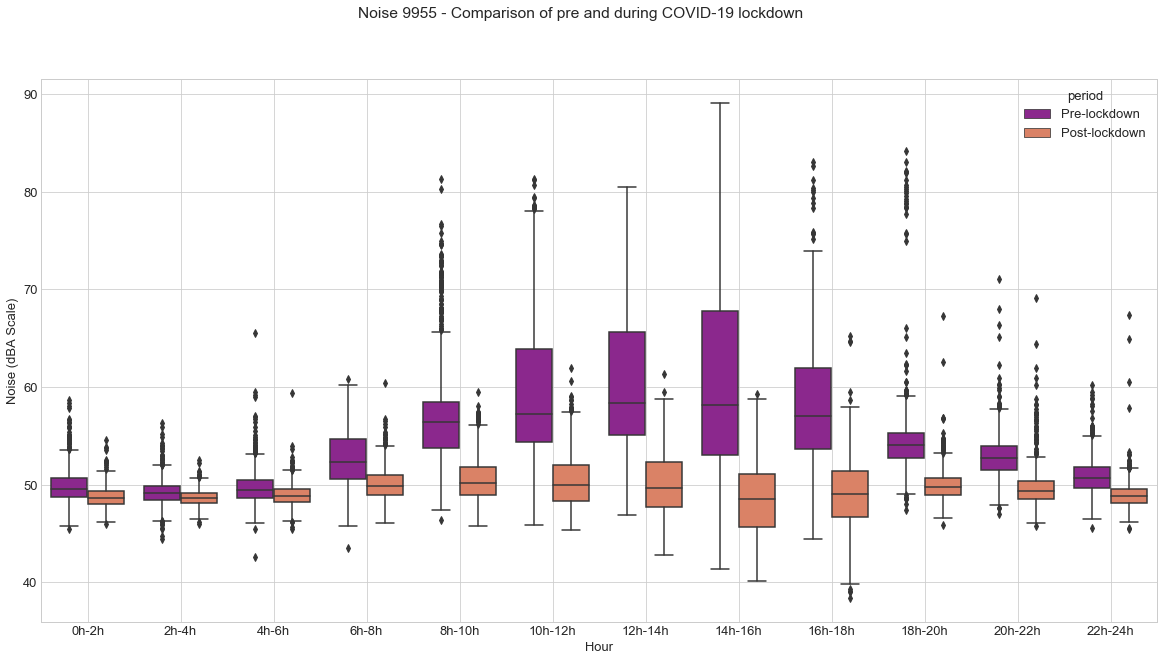

In [275]:
plot_description = {"type": "boxplot",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                    				"traces": {"1": {"device": 9955,
                                        			"channel" : "NOISE_A",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '1Min',
                                "clean_na": None,
                                "min_date": None,
                                "max_date": None,
                                "periods": {"dates": ['2020-01-20', '2020-03-15', None],
                                            "labels": ["Pre-lockdown", "Post-lockdown"]
                                           },
                                "relative": False
                                },
                    "formatting": {"title": "Noise 9955 - Comparison of pre and during COVID-19 lockdown",
                                   "cmap": "plasma",
                                   "ylabel": {1: "Noise (dBA Scale)"},
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 20,
                                   "frequency_hours": 2}
                    }

plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

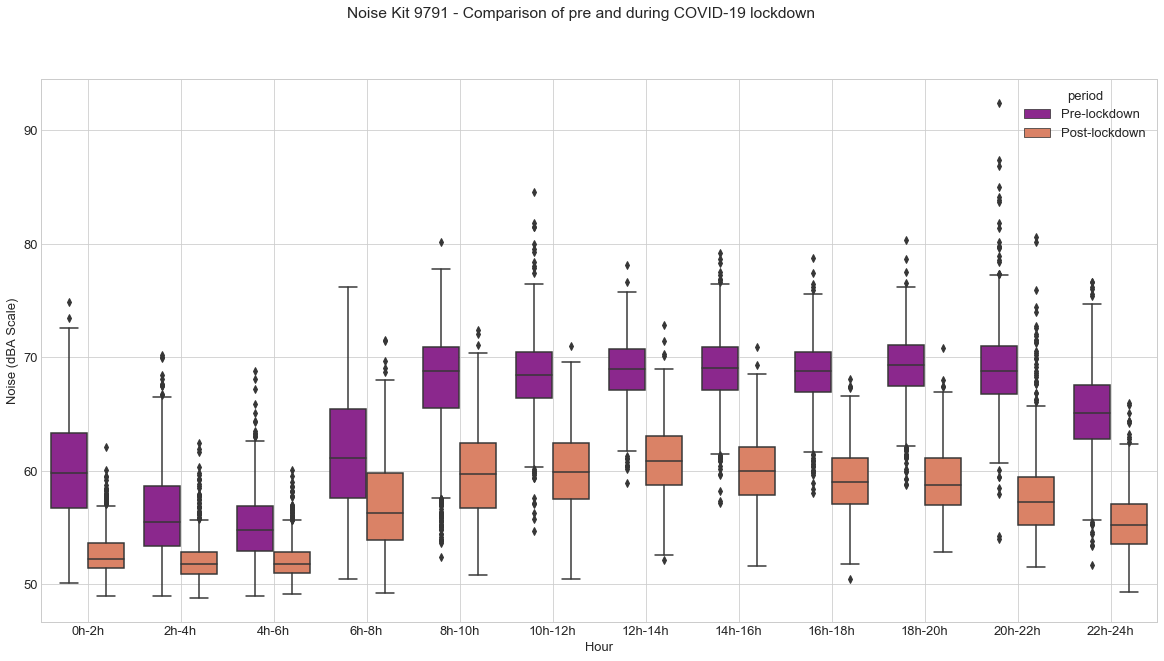

In [259]:
plot_description = {"type": "boxplot",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                    				"traces": {"1": {"device": [9791],
                                        			"channel" : "NOISE_A",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '1Min',
                                "clean_na": None,
                                "min_date": None,
                                "max_date": None,
                                "periods": {"dates": ['2020-01-20', '2020-03-15', None],
                                            "labels": ["Pre-lockdown", "Post-lockdown"]
                                           },
                                "relative": False
                                },
                    "formatting": {"title": "Noise Kit 9791 - Comparison of pre and during COVID-19 lockdown",
                                   "cmap": "plasma",
                                   "ylabel": {1: "Noise (dBA Scale)"},
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 20,
                                   "frequency_hours": 2}
                    }

plot = Plot(plot_description)
plot.plot(data)

## Make Report

In [8]:
## Export
import subprocess
import traceback

filename = str('Pollution Analysis during COVID-19 Lockdown')
print (f'Creating delivery report for {filename}')

subprocess.call(['jupyter', 'nbconvert', f'{filename}.ipynb',
                 '--config', 'sc_nbconvert_config.py',  '--sc_Preprocessor.expression="show_only_output"',
                 '--to', 'html',  '--TemplateExporter.template_file=./templates/full_sc',
                 '--output-dir=../data/reports', f'--output={filename}.html'])

subprocess.call(['open', f'../data/reports/{filename}.html'])

Creating delivery report for Pollution Analysis during COVID-19 Lockdown


0